In [ ]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from torch.utils import data

from pytorchcv import train, plot_results, display_dataset, train_long, check_image_dir

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, accuracy_score, recall_score, precision_score, roc_curve, RocCurveDisplay, roc_auc_score

In [ ]:
# Определяем на чем у нас будут производиться вычисления (cuda/cpu)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
def display_images(data, max_n = 8):
    n = min(max_n, len(data[0]))
    fig, ax = plt.subplots(1, n)
    for i in range(n):
        img = data[0][i].numpy()
        ax[i].imshow(img.transpose((1, 2, 0)))
        ax[i].axis("off")
    fig.set_size_inches(fig.get_size_inches() * n)
    plt.tight_layout()
    plt.show()

In [ ]:
img_size = (224,224)
batch_size = 10

train_transform = transforms.Compose([
            transforms.Resize(img_size),
            transforms.RandomHorizontalFlip(0.3),
            transforms.ToTensor(),
        ])

pets_data = datasets.OxfordIIITPet('data', download=True, transform=train_transform)

train_x, test_x = data.random_split(pets_data, [len(pets_data) * 8 // 10, len(pets_data) - len(pets_data) * 8 // 10])

In [ ]:
trainDataloader = data.DataLoader(train_x, batch_size=16)
validationDataloader = data.DataLoader(test_x, batch_size=16, shuffle=False)

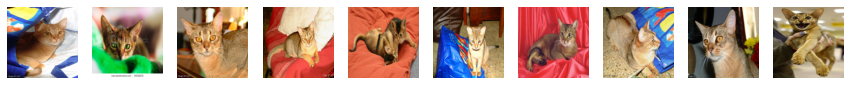

In [ ]:
display_dataset(pets_data)

## Vgg16

In [ ]:
vgg16 = torchvision.models.vgg16(pretrained=True)
vgg16.to(device)

vgg16.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(4096, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(4096, 37)).to(device)


for x in vgg16.features.parameters():
    x.requires_grad = False

summary(vgg16,(1, 3,244,244))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 244, 244]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 244, 244]         --
│    └─Conv2d: 2-3                       [1, 64, 244, 244]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 244, 244]         --
│    └─MaxPool2d: 2-5                    [1, 64, 122, 122]         --
│    └─Conv2d: 2-6                       [1, 128, 122, 122]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 122, 122]        --
│    └─Conv2d: 2-8                       [1, 128, 122, 122]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 122, 122]        --
│    └─MaxPool2d: 2-10                   [1, 128, 61, 61]          --
│    └─Conv2d: 2-11                      [1, 256, 61, 61]    

In [ ]:
train_long(vgg16, trainDataloader, validationDataloader, loss_fn=torch.nn.CrossEntropyLoss(), epochs=5, print_freq=200, lr=0.0001)

Epoch 0, minibatch 0: train acc = 0.0625, train loss = 0.22618235647678375
Epoch 0 done, validation acc = 0.6970108695652174, validation loss = 0.058248768682065216
Epoch 1, minibatch 0: train acc = 0.875, train loss = 0.03766937926411629
Epoch 1 done, validation acc = 0.6711956521739131, validation loss = 0.06303926136182703
Epoch 2, minibatch 0: train acc = 0.875, train loss = 0.024811530485749245
Epoch 2 done, validation acc = 0.7445652173913043, validation loss = 0.050944981367691704
Epoch 3, minibatch 0: train acc = 1.0, train loss = 0.000801694521214813
Epoch 3 done, validation acc = 0.7663043478260869, validation loss = 0.05193803621375043
Epoch 4, minibatch 0: train acc = 0.9375, train loss = 0.013715676963329315
Epoch 4 done, validation acc = 0.7282608695652174, validation loss = 0.05850442077802575


## VGG 19

In [ ]:
vgg19 = torchvision.models.vgg19(pretrained=True)
vgg19.to(device)

vgg19.classifier = torch.nn.Sequential(torch.nn.Linear(25088, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(4096, 4096),
                                       torch.nn.ReLU(),
                                       torch.nn.Linear(4096, 37)).to(device)

for x in vgg19.features.parameters():
    x.requires_grad = False

summary(vgg19, (1, 3,244,244))

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 244, 244]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 244, 244]         --
│    └─Conv2d: 2-3                       [1, 64, 244, 244]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 244, 244]         --
│    └─MaxPool2d: 2-5                    [1, 64, 122, 122]         --
│    └─Conv2d: 2-6                       [1, 128, 122, 122]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 122, 122]        --
│    └─Conv2d: 2-8                       [1, 128, 122, 122]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 122, 122]        --
│    └─MaxPool2d: 2-10                   [1, 128, 61, 61]          --
│    └─Conv2d: 2-11                      [1, 256, 61, 61]    

In [ ]:
train_long(vgg19, trainDataloader, validationDataloader, loss_fn=torch.nn.CrossEntropyLoss(), epochs=5, print_freq=200, lr=0.0001)

Epoch 0, minibatch 0: train acc = 0.0, train loss = 0.22716081142425537
Epoch 0 done, validation acc = 0.7255434782608695, validation loss = 0.052238630211871605
Epoch 1, minibatch 0: train acc = 0.8125, train loss = 0.03250710293650627
Epoch 1 done, validation acc = 0.7323369565217391, validation loss = 0.054046547931173576
Epoch 2, minibatch 0: train acc = 0.8125, train loss = 0.023693706840276718
Epoch 2 done, validation acc = 0.7459239130434783, validation loss = 0.056727808454762337
Epoch 3, minibatch 0: train acc = 0.9375, train loss = 0.016742173582315445
Epoch 3 done, validation acc = 0.7418478260869565, validation loss = 0.06110616870548414
Epoch 4, minibatch 0: train acc = 1.0, train loss = 0.002505955519154668
Epoch 4 done, validation acc = 0.7649456521739131, validation loss = 0.05561462692592455


## ResNet

In [ ]:
resnet = torchvision.models.resnet18(pretrained=True)
resnet.to(device)


resnet.fc = torch.nn.Sequential(torch.nn.Linear(512, 4096),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(4096, 4096),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(4096, 37)).to(device)

resnet.requires_grad_ = False

for x in resnet.fc.parameters():
    x.requires_grad = True

summary(resnet, (1, 3,244,244))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [1, 64, 122, 122]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 122, 122]         128
├─ReLU: 1-3                              [1, 64, 122, 122]         --
├─MaxPool2d: 1-4                         [1, 64, 61, 61]           --
├─Sequential: 1-5                        [1, 64, 61, 61]           --
│    └─BasicBlock: 2-1                   [1, 64, 61, 61]           --
│    │    └─Conv2d: 3-1                  [1, 64, 61, 61]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 61, 61]           128
│    │    └─ReLU: 3-3                    [1, 64, 61, 61]           --
│    │    └─Conv2d: 3-4                  [1, 64, 61, 61]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 61, 61]           128
│    │    └─ReLU: 3-6                    [1, 64, 61, 61]           --
│

In [ ]:
train_long(resnet, trainDataloader, validationDataloader, loss_fn=torch.nn.CrossEntropyLoss(), epochs=5, print_freq=200, lr=0.0001)

Epoch 0, minibatch 0: train acc = 0.0625, train loss = 0.22604495286941528
Epoch 0 done, validation acc = 0.8029891304347826, validation loss = 0.037338503029035484
Epoch 1, minibatch 0: train acc = 0.8125, train loss = 0.035225242376327515
Epoch 1 done, validation acc = 0.84375, validation loss = 0.032045053399127464
Epoch 2, minibatch 0: train acc = 0.9375, train loss = 0.006591212470084429
Epoch 2 done, validation acc = 0.8383152173913043, validation loss = 0.03529558492743451
Epoch 3, minibatch 0: train acc = 1.0, train loss = 0.005366405937820673
Epoch 3 done, validation acc = 0.8654891304347826, validation loss = 0.03287434059640636
Epoch 4, minibatch 0: train acc = 1.0, train loss = 0.0007229654584079981
Epoch 4 done, validation acc = 0.8600543478260869, validation loss = 0.03521932726321013


## "Кошки против собак"

In [ ]:
cat_labels = [0, 5, 6, 7, 9, 11, 20, 23, 26, 27, 32, 33]

In [ ]:
batch_accuracy = []

for (x, y) in validationDataloader:
  x = x.to(device)
  predictions = torch.argmax(resnet(x), axis = 1)
  binary_labels = [1 if i in cat_labels else 0 for i in predictions]
  binary_y = [1 if i in cat_labels else 0 for i in y]

  faults = 0
  for i in range(len(binary_labels)):
    if binary_labels[i] != binary_y[i]:
      faults += 1
  batch_accuracy.append((len(y)-faults)/len(y))

accuracy = sum(batch_accuracy)/len(batch_accuracy)
accuracy

0.9918478260869565

## Top-3 и Top-5 accuracy

In [ ]:
batch_accuracy = []
top_3_batch_accuracy = []
top_5_batch_accuracy = []

for (x, y) in validationDataloader:
  x = x.to(device)

  bin_predictions = torch.argmax(resnet(x), axis = 1)
  binary_labels = [1 if i in cat_labels else 0 for i in bin_predictions]
  binary_y = [1 if i in cat_labels else 0 for i in y]
  faults = 0
  for i in range(len(binary_labels)):
    if binary_labels[i] != binary_y[i]:
      faults += 1
  batch_accuracy.append((len(y)-faults)/len(y))

  predictions = resnet(x)
  top_3_faults = 0
  for i in range(len(predictions)):
    top_3 = torch.topk(predictions[i], 3)[1].tolist()

    is_cat = y[i].item() in cat_labels
    is_cat_in_top_k = sum([1 if i in cat_labels else 0 for i in top_3]) > 0

    is_dog = y[i].item() not in cat_labels
    is_dog_in_top_k = sum([1 if i not in cat_labels else 0 for i in top_3]) > 0

    if is_cat and is_cat_in_top_k == False:
      top_3_faults += 1
    elif top_3_faults and is_dog_in_top_k == False:
      top_3_faults += 1
  top_3_batch_accuracy.append((len(y)-top_3_faults)/len(y))

  top_5_faults = 0
  for i in range(len(predictions)):
    top_5 = torch.topk(predictions[i], 5)[1].tolist()

    is_cat = y[i].item() in cat_labels
    is_cat_in_top_k = sum([1 if i in cat_labels else 0 for i in top_5]) > 0

    is_dog = y[i].item() not in cat_labels
    is_dog_in_top_k = sum([1 if i not in cat_labels else 0 for i in top_5]) > 0

    if is_cat and is_cat_in_top_k == False:
      top_5_faults += 1
    elif top_3_faults and is_dog_in_top_k == False:
      top_5_faults += 1
  top_5_batch_accuracy.append((len(y)-top_5_faults)/len(y))

accuracy = sum(batch_accuracy)/len(batch_accuracy)
top_3_accuracy = sum(top_3_batch_accuracy)/len(top_3_batch_accuracy)
top_5_accuracy = sum(top_5_batch_accuracy)/len(top_5_batch_accuracy)

print('accuracy = ', accuracy)
print('top_3_accuracy = ', top_3_accuracy)
print('top_5_accuracy = ', top_5_accuracy)

accuracy =  0.9932065217391305
top_3_accuracy =  1.0
top_5_accuracy =  1.0


## Confusion matrix

In [ ]:
predictions = []
test_labels = []

for (x, y) in validationDataloader:
  x = x.to(device)
  predictions += torch.argmax(resnet(x), axis = 1).tolist()
  test_labels += y.tolist()

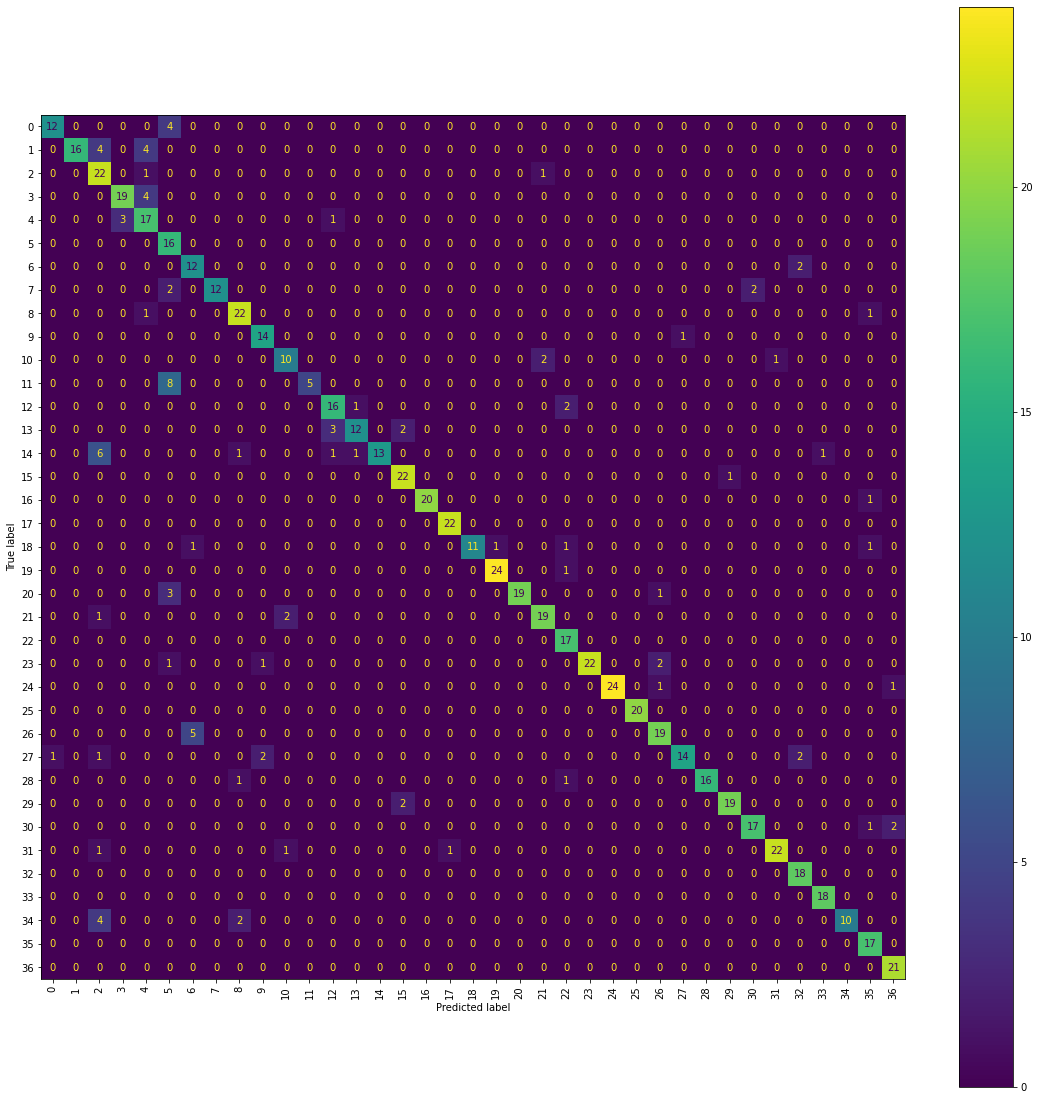

In [ ]:
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0, 0, 1.5, 1.5])

disp.plot(ax = ax, xticks_rotation='vertical')
plt.show()